In [ ]:
from numpy import *

def f(r,t,n):         # 'r' es el vector que contiene las variables, tanto de posición como de velocidad
  c=0.8
  g=9.81
  x,y=r[0],r[1]     # r=[x, y, v_x, v_y]
  vx,vy=r[2],r[3]

  fvx=-c*vx*sqrt(vx**2+vy**2)**(n-1)
  fvy=-g-c*vy*sqrt(vx**2+vy**2)**(n-1)

  fr=array([vx,vy,fvx,
            fvy], float) # fr= [fx, fy, fvx, fvy]
  return fr

def main(m):
  a,b=0,25
  N=1000
  h=(b-a)/N

  tpts=arange(a,b,h) # dominio (tiempo)

  xpts=zeros(len(tpts)) #coordenadas
  ypts=copy(xpts)

  vpts=copy(xpts) #velocidades
  upts=copy(xpts)

  r=array([0,0,18.23,12.3],float) # Valores iniciales, [x_0, y_0, v_x0, v_y0]
  i=0
  for t in tpts:
    xpts[i],ypts[i],vpts[i],upts[i]=r[0],r[1],r[2],r[3] #creación de los puntos a graficar
    k1=h*f(r,t,m)
    k2=h*f(r+0.5*k1,t+0.5*h,m)
    k3=h*f(r+0.5*k2,t+0.5*h,m)
    k4=h*f(r+k3,t+h,m)
    r+=(k1+2*k2+2*k3+k4)/6
    i+=1
  rap=sqrt(vpts**2+upts**2)   # rapidez del proyectil
  return xpts, ypts, rap, tpts

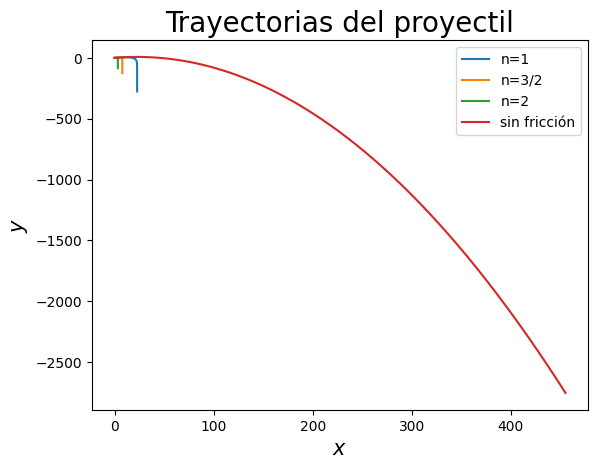

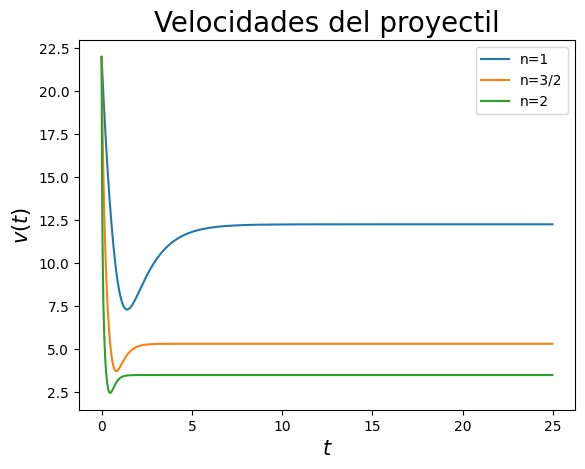

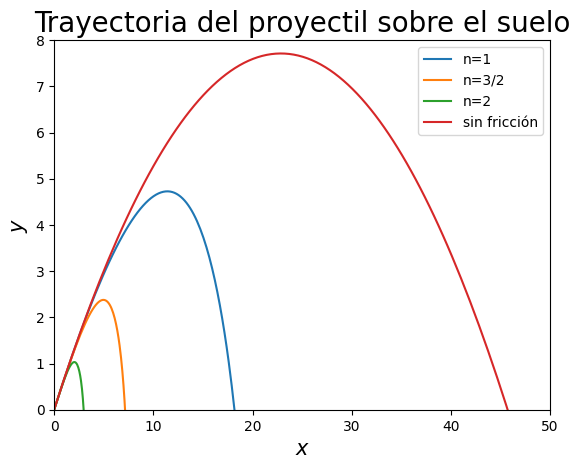

In [ ]:
import matplotlib.pyplot as plt

xpts1,ypts1,rap1,tpts1=main(1)
xpts2,ypts2,rap2,tpts2=main(3/2)
xpts3,ypts3,rap3,tpts3=main(2)
xpts=(18.23)*tpts1
ypts=(12.3)*tpts1-0.5*(9.81)*(tpts1)**2
rap=sqrt(18.23**2+(12.3-(9.81)*tpts1)**2)

#Grafica de trayectoria
plt.title('Trayectorias del proyectil', fontsize=20)
plt.plot(xpts1, ypts1, label='n=1')
plt.plot(xpts2, ypts2, label='n=3/2')
plt.plot(xpts3, ypts3, label='n=2')
plt.plot(xpts, ypts, label='sin fricción')

plt.xlabel('$x$',fontsize=15)
plt.ylabel('$y$',fontsize=15)
plt.legend()
plt.show()
print()


#Grafica de la rapidez
plt.title('Velocidades del proyectil',fontsize=20)
plt.plot(tpts1,rap1,label='n=1')
plt.plot(tpts2,rap2, label='n=3/2')
plt.plot(tpts3,rap3, label='n=2')
#plt.plot(tpts1,rap, label='sin fricción')
plt.xlabel('$t $',fontsize=15)
plt.ylabel('$v(t)$',fontsize=15)
plt.legend()
plt.show()
print()

#Grafica de trayectoria
plt.title('Trayectoria del proyectil sobre el suelo',fontsize=20)
plt.ylim(0,8)
plt.xlim(0,50)
plt.plot(xpts1, ypts1, label='n=1')
plt.plot(xpts2, ypts2, label='n=3/2')
plt.plot(xpts3, ypts3, label='n=2')
plt.plot(xpts, ypts, label='sin fricción')

plt.xlabel('$x$', fontsize=15)
plt.ylabel('$y$', fontsize=15)
plt.legend()
plt.show()

print()
